In [24]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [25]:
import numpy as np

In [26]:
# 定义欧氏距离
def euclidean(x, y):
    return np.sqrt(np.sum((x - y)**2))

In [27]:
# 定义曼哈顿距离
def manhattan(x, y):
    return np.sum(np.abs(x - y))

In [28]:
# 定义切比雪夫距离
def chebyshev(x, y):
    return np.max(np.abs(x - y))

In [29]:
# 定义闵可夫斯基距离
def minkowski(x, y, p):
    return np.sum(np.abs(x - y)**p)**(1 / p)

In [30]:
# 定义汉明距离
def hamming(x, y):
    return np.sum(x != y) / len(x)

In [31]:
# 余弦相似度
from math import *
def square_rooted(x):
    return round(sqrt(sum([a * a for a in x])), 3)

In [32]:
def cosine_similarity(x, y):
    numerator = sum(a * b for a, b in zip(x, y))
    denominator = square_rooted(x) * square_rooted(y)
    return round(numerator / float(denominator), 3)

In [33]:
print(cosine_similarity([3, 45, 7, 2], [2, 54, 13, 15]))

0.972


In [34]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
# knn算法实现
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

In [2]:
# 导入鸢尾花数据集
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


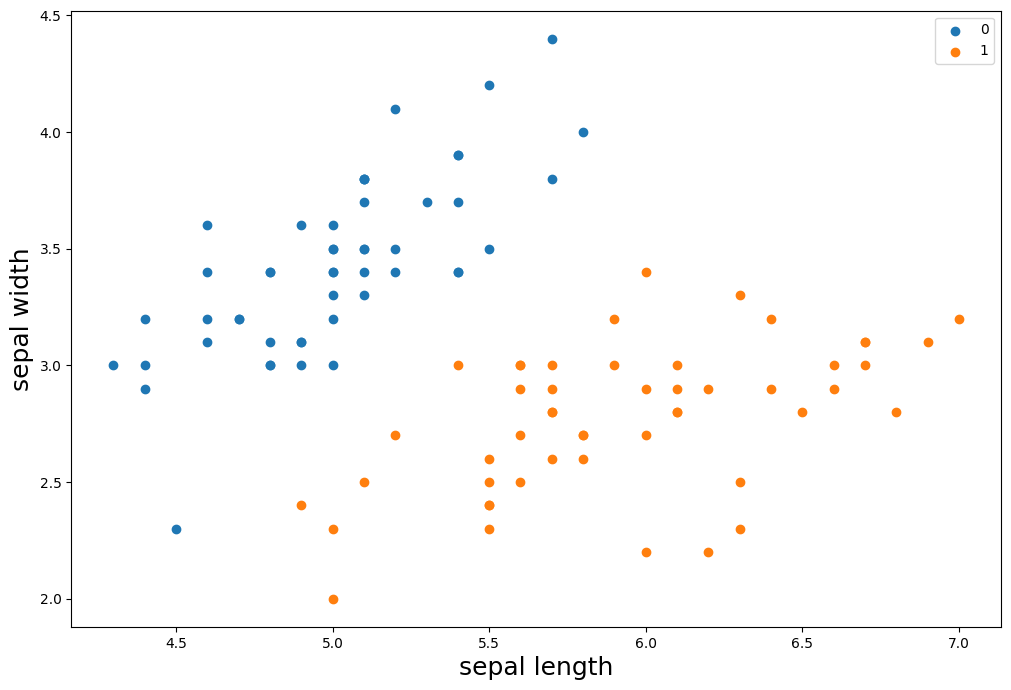

In [4]:
plt.figure(figsize=(12, 8))
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length', fontsize=18)
plt.ylabel('sepal width', fontsize=18)
plt.legend()
plt.show()

In [5]:
class KNN:
    def __init__(self, X_train, y_train, n_neighbors=3, p=2):
        self.n = n_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X):
        knn_list = []
        for i in range(self.n):  # 取出n个点
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            knn_list.append((dist, self.y_train[i]))
        for i in range(self.n, len(self.X_train)):
            max_index = knn_list.index(max(knn_list, key=lambda x: x[0]))
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist, self.y_train[i])
        knn = [k[-1] for k in knn_list]
        count_pairs = Counter(knn)
        max_count = sorted(count_pairs.items(), key=lambda x: x[1])[-1][0]
        return max_count
    
    def score(self, X_test, y_test):
        right_count = 0
        n = 10
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right_count += 1
        return right_count / len(X_test)

In [6]:
data = np.array(df.iloc[:150, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
clf = KNN(X_train, y_train)

In [8]:
clf.score(X_test, y_test)

0.6444444444444445

In [9]:
test_point = [6.0, 3.0]
print('Test Point: {}'.format(clf.predict(test_point)))

Test Point: 1.0


In [10]:
# sklearn实现

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
clf_sk = KNeighborsClassifier(n_neighbors=3)
clf_sk.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
clf_sk.score(X_test, y_test)

0.6666666666666666

In [14]:
clf_sk = KNeighborsClassifier(n_neighbors=4)
clf_sk.fit(X_train, y_train)
clf_sk.score(X_test, y_test)

0.6666666666666666

In [15]:
clf_sk = KNeighborsClassifier(n_neighbors=5)
clf_sk.fit(X_train, y_train)
clf_sk.score(X_test, y_test)

0.6444444444444445

In [16]:
# 自动调参，寻找最优k值
best_score = 0.0
best_k = -1
for k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score

print("best_k = " + str(best_k))
print("best_score = " + str(best_score))

best_k = 7
best_score = 0.6888888888888889


In [17]:
# KD树的划分与搜索

In [18]:
from collections import namedtuple
from pprint import pformat

In [19]:
class Node(namedtuple('Node', 'location left_child right_child')):
    def __repr__(self):
        return pformat(tuple(self))

In [21]:
# 定义kd树
class KdNode(object):
    def __init__(self, dom_elt, split, left, right):
        self.dom_elt = dom_elt
        self.split = split
        self.left = left  # 分割超平面左子空间
        self.right = right  # 分割超平面右子空间

class KdTreeCreate(object):
    def __init__(self, data):
        k = len(data[0])
        def CreateNode(split, data_set): # 创建kdnode
            if not data_set: 
                return None
            data_set.sort(key=lambda x: x[split])
            split_pos = len(data_set) // 2 
            median = data_set[split_pos]  
            split_next = (split + 1) % k 
            return KdNode(
                median,
                split,
                CreateNode(split_next, data_set[:split_pos]),  # 创建左子树
                CreateNode(split_next, data_set[split_pos + 1:]))  # 创建右子树
        self.root = CreateNode(0, data)
# 进行kd树的前序遍历
def preorder(root):
    print(root.dom_elt)
    if root.left:  
        preorder(root.left)
    if root.right:
        preorder(root.right)

In [22]:
from math import sqrt
from collections import namedtuple
# 对kd树进行搜索，寻找与目标点相近的样本点
result = namedtuple("Result_tuple",
                    "nearest_point  nearest_dist  nodes_visited")
def find_nearest(tree, point):
    k = len(point)
    def travel(kd_node, target, max_dist):
        if kd_node is None:
            return result([0] * k, float("inf"),
                          0)  
        nodes_visited = 1
        s = kd_node.split 
        pivot = kd_node.dom_elt 
        if target[s] <= pivot[s]:  
            nearer_node = kd_node.left  
            further_node = kd_node.right  
        else:  # 目标离右子树更近
            nearer_node = kd_node.right  # 下一个访问节点为右子树根节点
            further_node = kd_node.left
        temp1 = travel(nearer_node, target, max_dist)  
        nearest = temp1.nearest_point  # 此叶结点作为“当前最近点”
        dist = temp1.nearest_dist  
        nodes_visited += temp1.nodes_visited
        if dist < max_dist:
            max_dist = dist  
        temp_dist = abs(pivot[s] - target[s])  
        if max_dist < temp_dist:  
            return result(nearest, dist, nodes_visited)  

        temp_dist = sqrt(sum((p1 - p2)**2 for p1, p2 in zip(pivot, target)))
        if temp_dist < dist:  
            nearest = pivot  
            dist = temp_dist  
            max_dist = dist  
        temp2 = travel(further_node, target, max_dist)
        nodes_visited += temp2.nodes_visited
        if temp2.nearest_dist < dist:  
            nearest = temp2.nearest_point  
            dist = temp2.nearest_dist 
        return result(nearest, dist, nodes_visited)
    return travel(tree.root, point, float("inf"))

In [23]:
from time import process_time
from random import random

In [24]:
def random_point(k):
    return [random() for _ in range(k)]
def random_points(k, n):
    return [random_point(k) for _ in range(n)]

In [25]:
N = 400000
t0 = process_time()
kd2 = KdTreeCreate(random_points(3, N))  
ret2 = find_nearest(kd2, [0.1, 0.5, 0.8]) 
t1 = process_time()
print("time: ", t1 - t0, "s")
print(ret2)

time:  2.492058000000001 s
Result_tuple(nearest_point=[0.10572760458152675, 0.49504717488670713, 0.805147007732802], nearest_dist=0.009155742430120776, nodes_visited=64)


In [37]:
# 作图绘制kd树
from operator import itemgetter

def kdtree(point_list, depth=0):
    if len(point_list) == 0:
        return None
    axis = depth % 2
    point_list.sort(key=itemgetter(axis))
    median = len(point_list) // 2
    return Node(
        location = point_list[median],
        left_child = kdtree(point_list[:median], depth + 1),
        right_child = kdtree(point_list[median + 1:], depth + 1)
    )

In [38]:
import matplotlib.pyplot as plt

line_width = [4., 3.5, 3., 2.5, 2., 1.5, 1., .5, 0.3]
def plot_tree(tree, min_x, max_x, min_y, max_y, prev_node, branch, depth=0):
    cur_node = tree.location
    left_branch = tree.left_child
    right_branch = tree.right_child
    if depth > len(line_width) - 1:
        ln_width = line_width[len(line_width) - 1]
    else:
        ln_width = line_width[depth]
    k = len(cur_node)
    axis = depth % k
    if axis == 0:
        if branch is not None and prev_node is not None:
            if branch:
                max_y = prev_node[1]
            else:
                min_y = prev_node[1]
        plt.plot([cur_node[0], cur_node[0]], [min_y, max_y],
                 linestyle='-',
                 color='red',
                 linewidth=ln_width)
    elif axis == 1:
        if branch is not None and prev_node is not None:
            if branch:
                max_x = prev_node[0]
            else:
                min_x = prev_node[0]

        plt.plot([min_x, max_x], [cur_node[1], cur_node[1]],
                 linestyle='-',
                 color='blue',
                 linewidth=ln_width)
    plt.plot(cur_node[0], cur_node[1], 'ko') # 绘制当前结点
    if left_branch is not None:
        plot_tree(left_branch, min_x, max_x, min_y, max_y, cur_node, True,
                  depth + 1)

    if right_branch is not None:
        plot_tree(right_branch, min_x, max_x, min_y, max_y, cur_node, False,
                  depth + 1)

In [41]:
def create_diagram(tree, width, height, min_val, max_val, delta):
    plt.figure("Kd Tree", figsize=(width, height))
    plt.axis(
        [min_val - delta, max_val + delta, min_val - delta, max_val + delta])
    plt.grid(b=True, which='major', color='0.75', linestyle='--')
    plt.xticks([i for i in range(min_val - delta, max_val + delta, 1)])
    plt.yticks([i for i in range(min_val - delta, max_val + delta, 1)])
    plot_tree(tree, min_val - delta, max_val + delta, min_val - delta,
                  max_val + delta, None, None)
    plt.title('KD Tree')

In [42]:
def label_nodes(node, i):
    loc = node.location
    plt.text(loc[0] + 0.15, loc[1] + 0.15, str(i), fontsize=10)
    if node.left_child:
        i = label_nodes(node.left_child, i + 1)
    if node.right_child:
        i = label_nodes(node.right_child, i + 1)
    return i

In [43]:
def draw_target(point, radius):
    plt.plot(point[0], point[1], marker='o', color='#ff007f')
    circle = plt.Circle(point,
                        0.3,
                        facecolor='#ff007f',
                        edgecolor='#ff007f',
                        alpha=0.5)
    plt.gca().add_patch(circle)
    circle = plt.Circle(point,
                        radius,
                        facecolor='#ffd83d',
                        edgecolor='#ffd83d',
                        alpha=0.5)
    plt.gca().add_patch(circle)

In [44]:
def draw_neighbors(point_list):
    for point in point_list:
        plt.plot(point[0], point[1], 'go')
        circle = plt.Circle(point,
                            0.3,
                            facecolor='#33cc00',
                            edgecolor='#33cc00',
                            alpha=0.5)
        plt.gca().add_patch(circle)

In [47]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [48]:
from graphviz import Digraph

def add_node(dot, node, parent_id=None, i=0, edge_label=''):
    loc = node.location
    node_id = str(i)
    dot.node(node_id, f"{i}\n({loc[0]},{loc[1]})")
    if parent_id:
        dot.edge(parent_id, node_id, label=edge_label)
    if node.left_child:
        i = add_node(dot, node.left_child, node_id, i + 1, 'l')
    if node.right_child:
        i = add_node(dot, node.right_child, node_id, i + 1, 'r')
    return i
def create_graph(tree):
    dot = Digraph(comment='Kd-tree')
    dot.attr('node',
             fontsize='20',
             shape='circle',
             width='1',
             fixedsize='true')
    dot.attr('edge', arrowsize='0.7')
    add_node(dot, tree)
    return dot

In [49]:
point_list1 = [(2,3),(5,7),(9,6),(4,5),(6,4),(7,2)]
tree = kdtree(point_list1)
print(tree)
create_graph(tree)

((6, 4),
 ((4, 5), ((2, 3), None, None), ((5, 7), None, None)),
 ((9, 6), ((7, 2), None, None), None))


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [50]:
max_int = 10000000
min_int = -max_int - 1
max_float = float('inf')

In [51]:
def get_val_range(point_list):
    min_val = max_int
    max_val = -max_int - 1
    for point in point_list:
        min_v = min(point)
        if min_v < min_val:
            min_val = min_v
        max_v = max(point)
        if max_v > max_val:
            max_val = max_v
    return (min_val, max_val)

In [52]:
min_val, max_val=get_val_range(point_list1)

/var/folders/zb/364yznl52m77t2qs4wsb69w40000gn/T/ipykernel_45769/2433073838.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='0.75', linestyle='--')


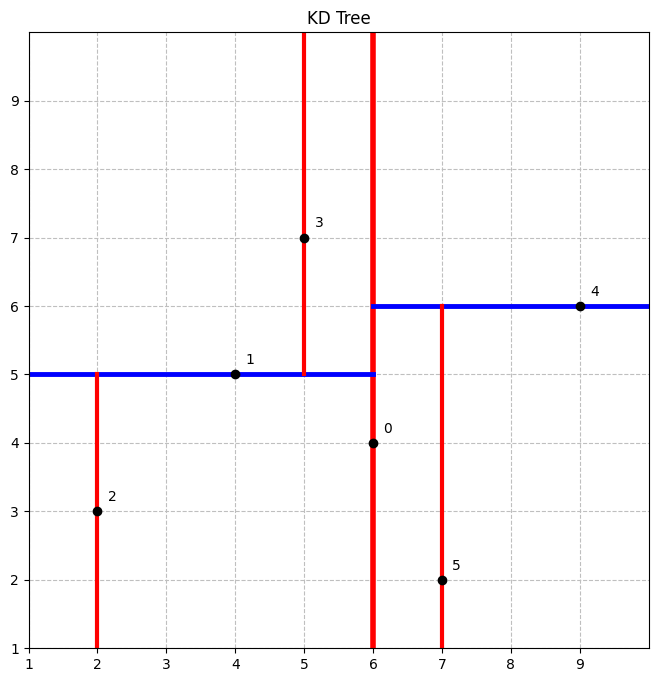

In [53]:
create_diagram(tree, 8., 8., min_val, max_val, 1)
label_nodes(tree, 0)
plt.show()